In [19]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [20]:
print('x_train.shape:', x_train.shape)
print('x_test.shape:', x_test.shape)
print('y_train.shape:', y_train.shape)
print('y_test.shape:', y_test.shape)

x_train.shape: (50000, 32, 32, 3)
x_test.shape: (10000, 32, 32, 3)
y_train.shape: (50000, 1)
y_test.shape: (10000, 1)


In [21]:
from keras.utils import to_categorical

x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [22]:
from keras.models import Sequential

model = Sequential()

In [23]:
from keras.layers import Conv2D

model.add(
    Conv2D(
        filters = 32,
        input_shape = (32, 32, 3),
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu'
    )
)

model.add(
    Conv2D(
        filters = 32,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu'
    )
)

In [24]:
from keras.layers import MaxPooling2D

model.add(MaxPooling2D(pool_size=(2, 2)))

In [25]:
from keras.layers import Dropout

model.add(Dropout(0.25))

In [26]:
model.add(
    Conv2D(
        filters = 64,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding = 'same',
        activation='relu'
    )
)

model.add(
    Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu'
    )
)

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [27]:
model.output_shape

(None, 8, 8, 64)

In [28]:
from keras.layers import Flatten

model.add(Flatten())
model.output_shape

(None, 4096)

In [29]:
from keras.layers import Dense

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

In [30]:
from keras.callbacks import TensorBoard
import os

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

log_dir = './logs'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
tsb = TensorBoard(log_dir='./logs')

history_model1 = model.fit(
    x_train,
    y_train,
    batch_size = 32,
    epochs=20,
    validation_split = 0.2,

)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 27ms/step - accuracy: 0.3199 - loss: 1.8376 - val_accuracy: 0.5784 - val_loss: 1.1910
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.5695 - loss: 1.1977 - val_accuracy: 0.6439 - val_loss: 1.0066
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.6360 - loss: 1.0241 - val_accuracy: 0.6850 - val_loss: 0.8833
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.6774 - loss: 0.9072 - val_accuracy: 0.7191 - val_loss: 0.8121
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.7078 - loss: 0.8257 - val_accuracy: 0.7214 - val_loss: 0.7980
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.7238 - loss: 0.7770 - val_accuracy: 0.7434 - val_loss: 0.7364
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.7463 - loss: 0.7166 - val_accuracy: 0.7482 - val_loss: 0.7246
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - accuracy: 0.7589 -

In [41]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Accuracy
    plt.figure(figsize=(12, 10))

    plt.subplot(2, 2, 1)
    plt.plot(epochs, acc, 'b')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    # Loss
    plt.subplot(2, 2, 2)
    plt.plot(epochs, loss, 'r')
    plt.title('Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Validation Accuracy
    plt.subplot(2, 2, 3)
    plt.plot(epochs, val_acc, 'g')
    plt.title('Validation Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')

    # Validation Loss
    plt.subplot(2, 2, 4)
    plt.plot(epochs, val_loss, 'purple')
    plt.title('Validation Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')

    plt.tight_layout()
    plt.savefig('training_history_graph_CNN.png')  # グラフを画像として保存
    plt.show()

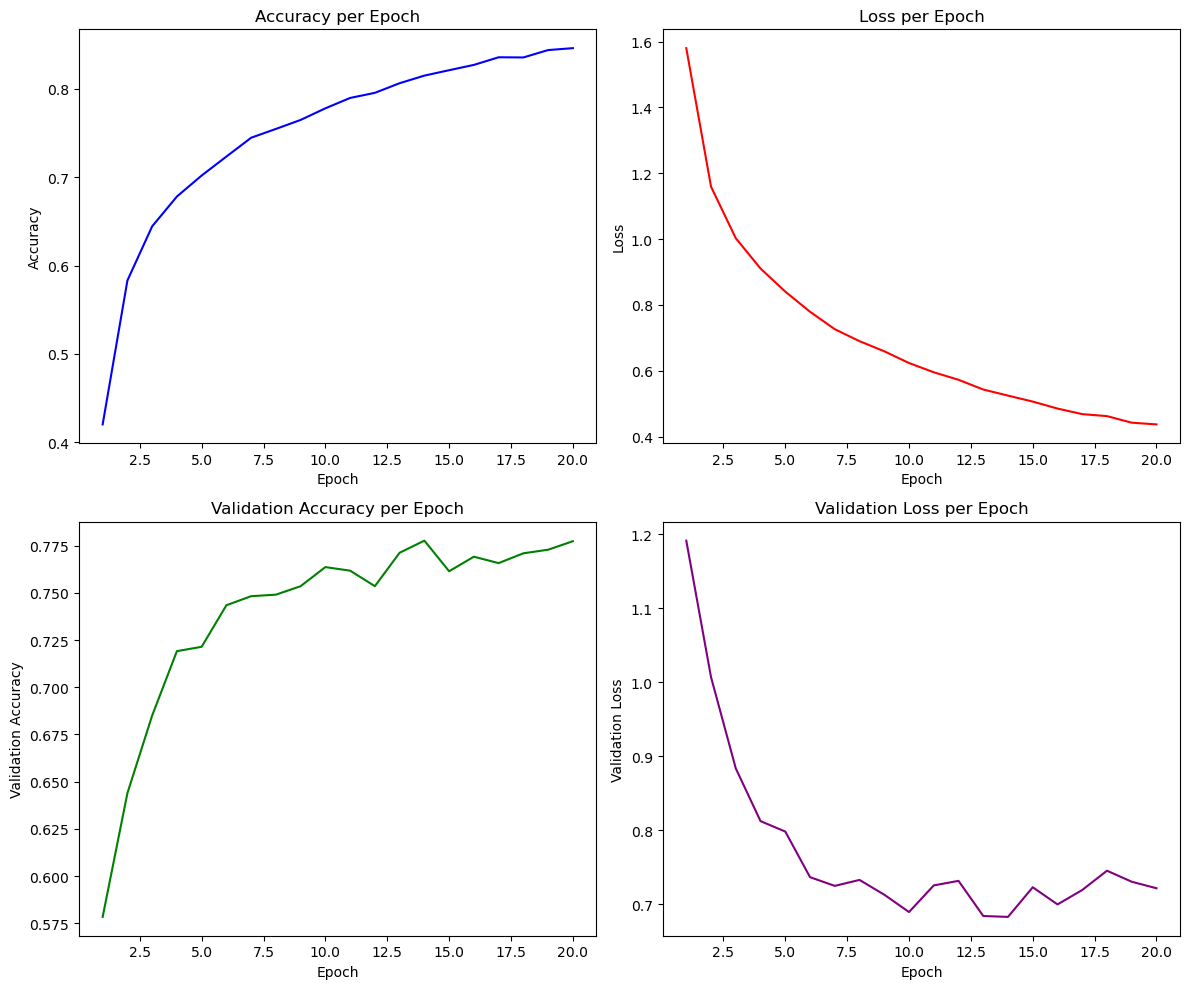

In [42]:
plot_history(history_model1)